# General evaluation

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_visualizations import flatten_data, plots_per_condition, filter_data, plot_combined_boxplots

# remove waringns
import warnings
warnings.filterwarnings("ignore")

## Load data for evaluation

In [2]:
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (2880, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,20,...,0.866526,0.025,1.0,0.962943,2,1,5,4,1,7
1,rf,200,100000,8,0,identity,5,5,200,20,...,0.851083,0.025,1.0,0.952666,3,1,5,3,1,5
2,rf,200,100000,8,0,identity,5,5,200,20,...,0.892708,0.025,1.0,0.955146,2,1,7,3,1,6
3,rf,200,100000,8,0,identity,5,5,200,20,...,0.858054,0.025,1.0,0.954002,2,1,4,2,1,6
4,rf,200,100000,8,0,identity,5,5,200,20,...,0.847100,0.025,1.0,0.940897,3,1,6,4,1,5


## Descriptives
#### Single variables, no dictionnaries/lists
* repetition', 'random_state', 'hyperparameters_same'  
* 'running_time_unstratified', 'running_time_stratified', 'running_time_repetition', 'cv_unstratified_iterations_mean_fit_time'  


In [3]:
#  'hyperparameters_same'
data['hyperparameters_same'].value_counts()

hyperparameters_same
False    1894
True      986
Name: count, dtype: int64

In [4]:
# check 'random_state' unique
print(len(data['random_state']))
print(len(data['random_state'].unique()))

2880
2880


In [5]:
# check 'repetition' complete
data['repetition'].value_counts().unique()

array([120,  96,  48,  24])

### Data dictionnaries in json file

In [7]:
# overview of keys
print('keys_dic:', len(keys_dic), keys_dic)

keys_dic: 10 ['cv_stratified_iterations', 'cv_folds_descriptives_unstratified', 'cv_unstratified_iterations', 'unstratified_results', 'model_info', 'stratified_results', 'cv_iteration_refit_test', 'stratified_best_params', 'cv_folds_descriptives_stratified', 'unstratified_best_params']


#### model_info

In [8]:
# Filter columns that contain 'model_info'
key = 'model_info'
colum = [col for col in data.columns if key in col] 
colum

['model_info_model',
 'model_info_n_train',
 'model_info_n_test',
 'model_info_n_features',
 'model_info_noise',
 'model_info_transformation',
 'model_info_group_size',
 'model_info_n_folds',
 'model_info_n_iter',
 'model_info_n_repetitions',
 'model_info_scoring',
 'model_info_n_jobs',
 'model_info_json_file']

In [9]:
# give summary of every column
data_desciptives = data.loc[:, colum]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,model_info_json_file
count,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880
unique,1,2,1,1,2,3,2,1,1,4,1,1,5
top,rf,200,100000,8,0,identity,5,5,200,48,neg_mean_squared_error,1,/home/annegriddl/slds_stratification/Simulatio...
freq,2880,1440,2880,2880,1440,960,1440,2880,2880,1152,2880,2880,1152


In [10]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
rf    2880
Name: count, dtype: int64


model_info_n_train
200     1440
1000    1440
Name: count, dtype: int64


model_info_n_test
100000    2880
Name: count, dtype: int64


model_info_n_features
8    2880
Name: count, dtype: int64


model_info_noise
0    1440
3    1440
Name: count, dtype: int64


model_info_transformation
identity    960
log         960
sqrt        960
Name: count, dtype: int64


model_info_group_size
5     1440
10    1440
Name: count, dtype: int64


model_info_n_folds
5    2880
Name: count, dtype: int64


model_info_n_iter
200    2880
Name: count, dtype: int64


model_info_n_repetitions
48    1152
20     960
22     528
10     240
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error    2880
Name: count, dtype: int64


model_info_n_jobs
1    2880
Name: count, dtype: int64


model_info_json_file
/home/annegriddl/slds_stratification/Simulations/Final_Setup/results/results_rf4.json    1152
/home/annegriddl/slds_stratification/Simulations/

#### cv_folds_descreptives_stratified

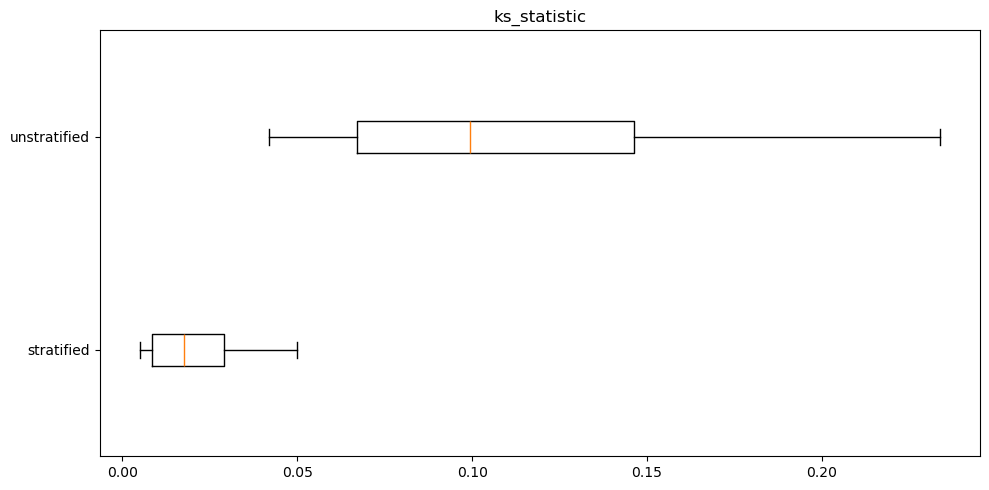

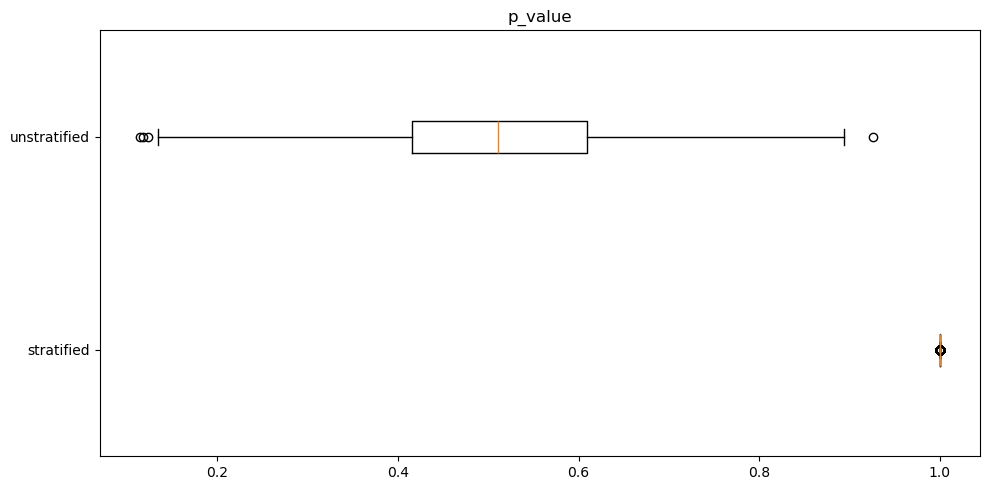

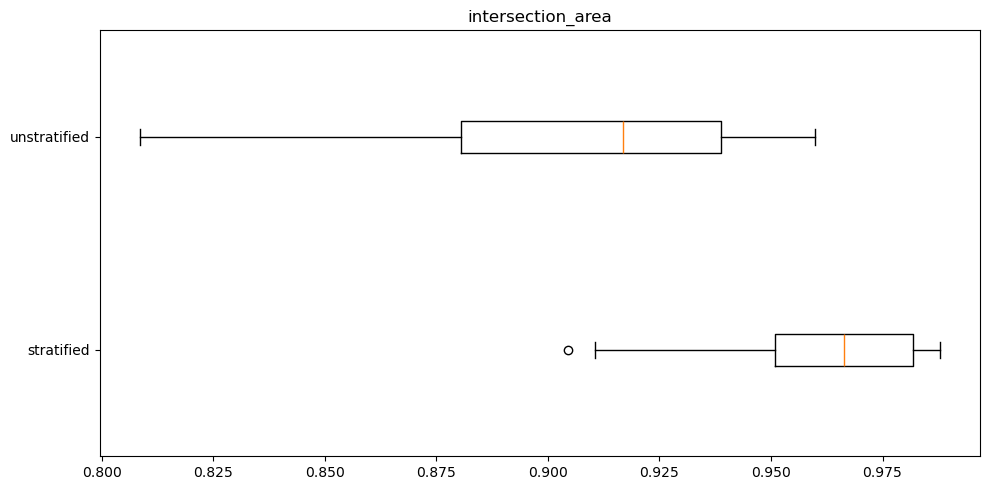

In [12]:
statistics = ['ks_statistic', 'p_value', 'intersection_area']

for s in statistics:
    s_stratified = '_stratified_' + s
    s_unstratified = '_unstratified_' + s
    s_stratified = [col for col in data.columns if s_stratified in col]
    s_unstratified = [col for col in data.columns if s_unstratified in col]
    #print(len(data[s_stratified]))

    plot_combined_boxplots(data_x= data[s_stratified], data_y = data[s_unstratified], title= s)

#### cv_unstratified_iterations

In [13]:
key = 'cv_stratified_iterations'
print(key)
colum1 = [col for col in data.columns if key in col]

key = 'cv_unstratified_iterations'
print(key)
colum2 = [col for col in data.columns if key in col]

colum = colum1 + colum2

print(len(colum))

cv_stratified_iterations
cv_unstratified_iterations
32


In [14]:
data[colum]

,cv_stratified_iterations_mean_fit_time,cv_stratified_iterations_std_fit_time,cv_stratified_iterations_mean_score_time,cv_stratified_iterations_std_score_time,cv_stratified_iterations_param_min_samples_split,cv_stratified_iterations_param_min_samples_leaf,cv_stratified_iterations_param_max_features,cv_stratified_iterations_params,cv_stratified_iterations_split0_test_score,cv_stratified_iterations_split1_test_score,...,cv_unstratified_iterations_param_max_features,cv_unstratified_iterations_params,cv_unstratified_iterations_split0_test_score,cv_unstratified_iterations_split1_test_score,cv_unstratified_iterations_split2_test_score,cv_unstratified_iterations_split3_test_score,cv_unstratified_iterations_split4_test_score,cv_unstratified_iterations_mean_test_score,cv_unstratified_iterations_std_test_score,cv_unstratified_iterations_rank_test_score
0,"[0.6216261386871338, 0.7308226585388183, 0.610...","[0.028424127619529258, 0.025091723303882343, 0...","[0.01611752510070801, 0.01685299873352051, 0.0...","[0.0012790300646356822, 0.0008941505726133884,...","[10, 8, 4, 9, 9, 9, 2, 6, 2, 6, 6, 6, 3, 4, 2,...","[6, 2, 8, 6, 5, 10, 10, 5, 2, 10, 10, 8, 10, 1...","[6, 8, 3, 2, 6, 4, 7, 1, 5, 1, 2, 6, 4, 6, 8, ...","[{'min_samples_split': 10, 'min_samples_leaf':...","[-8.399234417897409, -7.321867828980352, -9.69...","[-7.279063907679687, -6.795156273851328, -7.86...",...,"[6, 8, 3, 2, 6, 4, 7, 1, 5, 1, 2, 6, 4, 6, 8, ...","[{'min_samples_split': 10, 'min_samples_leaf':...","[-7.504843477568036, -6.180812730678116, -9.68...","[-6.1379653448302545, -5.428976261710565, -7.1...","[-8.728539765580141, -8.048209837146045, -11.3...","[-5.686813013509616, -5.636769967933281, -5.43...","[-6.289878892666323, -4.923230436382448, -7.37...","[-6.869608098830875, -6.043599846770091, -8.18...","[1.1072074976141073, 1.080350767703119, 2.0684...","[78, 19, 147, 160, 55, 153, 139, 185, 8, 200, ..."
1,"[0.5429324150085449, 0.4895612716674805, 0.600...","[0.002583182615233865, 0.06486413228240484, 0....","[0.019530487060546876, 0.016544437408447264, 0...","[0.0016829793008844675, 0.0037090836651996486,...","[7, 8, 9, 9, 10, 4, 8, 10, 3, 7, 7, 7, 6, 4, 8...","[7, 7, 4, 1, 1, 2, 3, 8, 6, 7, 10, 7, 8, 10, 5...","[1, 1, 3, 8, 1, 2, 6, 2, 5, 6, 7, 5, 6, 5, 8, ...","[{'min_samples_split': 7, 'min_samples_leaf': ...","[-11.088322094471849, -11.088322094471849, -6....","[-13.250828443264776, -13.250828443264776, -6....",...,"[1, 1, 3, 8, 1, 2, 6, 2, 5, 6, 7, 5, 6, 5, 8, ...","[{'min_samples_split': 7, 'min_samples_leaf': ...","[-15.127509215456897, -15.127509215456897, -8....","[-9.75092873040941, -9.75092873040941, -4.6874...","[-21.722362421129365, -21.722362421129365, -12...","[-11.087399532866078, -11.087399532866078, -5....","[-7.780166580506619, -7.780166580506619, -5.19...","[-13.093673296073675, -13.093673296073675, -7....","[4.940105137027289, 4.940105137027289, 2.95471...","[184, 184, 49, 37, 170, 52, 30, 162, 66, 100, ..."
2,"[0.7703309535980225, 0.6992202758789062, 0.600...","[0.090410978042109, 0.025029009204874775, 0.01...","[0.020316219329833983, 0.024590063095092773, 0...","[0.0018598188715566407, 0.0018475607959627016,...","[8, 10, 5, 2, 10, 9, 6, 3, 5, 6, 5, 8, 4, 4, 7...","[1, 5, 5, 3, 2, 6, 10, 5, 8, 3, 4, 2, 9, 4, 2,...","[6, 6, 2, 2, 8, 8, 6, 1, 8, 4, 1, 8, 2, 7, 7, ...","[{'min_samples_split': 8, 'min_samples_leaf': ...","[-6.680285048929892, -7.688071750813167, -9.39...","[-4.187636997548029, -4.999093246744404, -7.85...",...,"[6, 6, 2, 2, 8, 8, 6, 1, 8, 4, 1, 8, 2, 7, 7, ...","[{'min_samples_split': 8, 'min_samples_leaf': ...","[-5.542898916419066, -6.5448219165453, -7.7673...","[-5.046086391601543, -5.609076993632117, -7.60...","[-4.743109981570337, -5.514802184353156, -7.64...","[-3.7708225037099345, -4.369415337273022, -5.6...","[-6.243392521285025, -6.763505704088466, -9.98...","[-5.069262062917181, -5.760324427178412, -7.72...","[0.8241082189960693, 0.8531815796679582, 1.385...","[20, 65, 157, 124, 48, 73, 132, 189, 109, 44, ..."
3,"[0.7

Fit time stratified vs. unstratiffied:

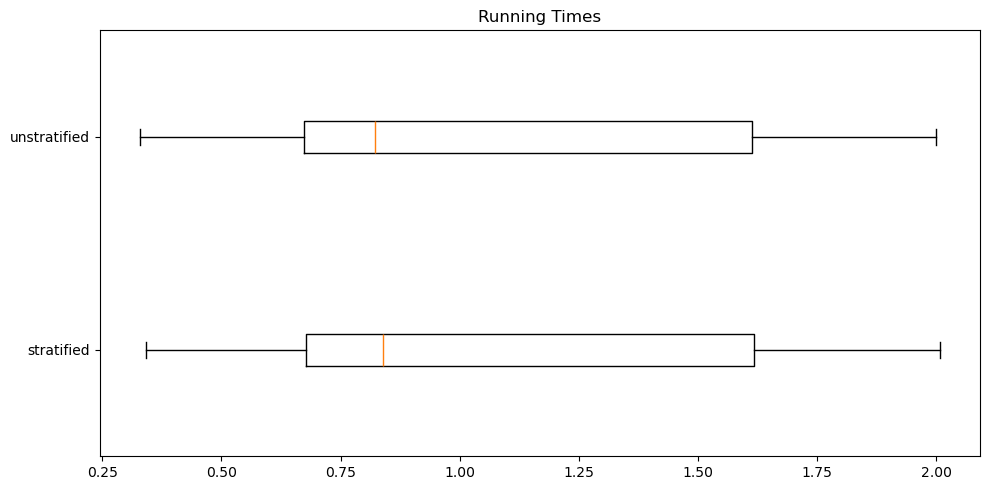

In [15]:
mean_fit_time_stratified = [np.mean(x) for x in data['cv_stratified_iterations_mean_fit_time']]
mean_fit_time_unstratified = [np.mean(x) for x in data['cv_unstratified_iterations_mean_fit_time']]

plot_combined_boxplots( mean_fit_time_stratified, mean_fit_time_unstratified, 'Running Times')

Unstratified: Negative MSE

In [16]:
print(f"Unstratified: Negative MSE {np.mean(data['cv_unstratified_iterations_mean_test_score'].explode().tolist())} with sd of  {np.sqrt(np.var(data['cv_unstratified_iterations_std_test_score'].explode().tolist()))}")
print(f"Stratified: Negative MSE {np.mean(data['cv_stratified_iterations_mean_test_score'].explode().tolist())} with sd of {np.sqrt(np.var(data['cv_stratified_iterations_std_test_score'].explode().tolist()))}")

Unstratified: Negative MSE -3.4937396187650194 with sd of  1.0631378457006637
Stratified: Negative MSE -3.457816976064034 with sd of 0.7087875329252986


In [17]:
from scipy.stats import spearmanr

correlation_coefficient_list = []
p_value_list = []

# Calculate Spearman's correlation coefficient and p-value for each iteration
for i in range(len(data['cv_stratified_iterations_mean_test_score'])):
    correlation_coefficient, p_value = spearmanr(data['cv_stratified_iterations_rank_test_score'][0], data['cv_unstratified_iterations_rank_test_score'][0])
    correlation_coefficient_list.append(correlation_coefficient)
    p_value_list.append(p_value)

# Print the mean and variance of the correlation coefficient
print("Mean of correlation coefficient:", np.mean(correlation_coefficient_list))
print("Variance of correlation coefficient:", np.var(correlation_coefficient_list))

# Print the mean and variance of the p-value
print("Mean of p-value:", np.mean(p_value_list))
print("Variance of p-value:", np.var(p_value_list))


Mean of correlation coefficient: 0.9986856704318609
Variance of correlation coefficient: 0.0
Mean of p-value: 1.9013125067583867e-257
Variance of p-value: 0.0


#### Gerneralisierungsfehler

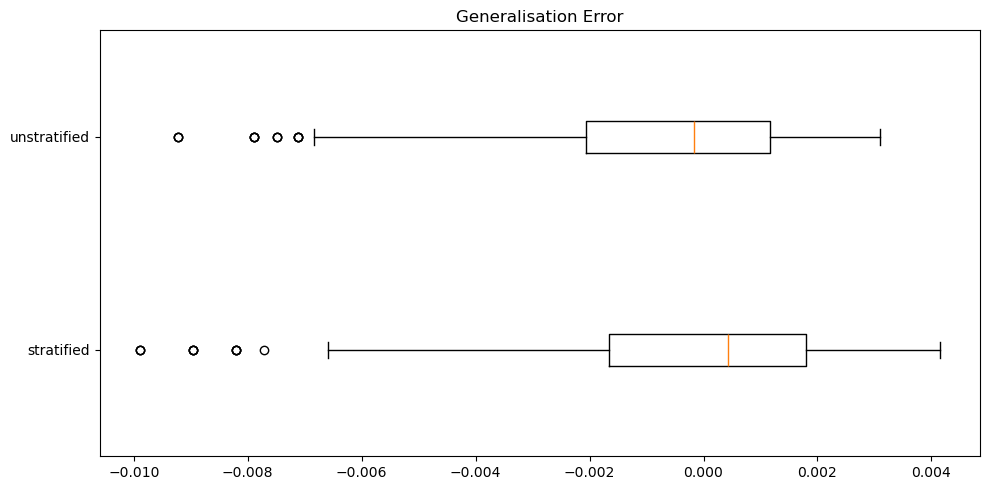

In [18]:
gen_error_stratified_list = []
gen_error_unstratified_list = []

for i in range(len(data)):
    # generalisation error: stratified
    gen_error_stratified = np.array(data['cv_iteration_refit_test_mse'][i]) + np.array(data['cv_stratified_iterations_mean_test_score'][i])
    gen_error_stratified
    # generalisation error: unstratified
    gen_error_unstratified = np.array(data['cv_iteration_refit_test_mse'][i]) + np.array(data['cv_unstratified_iterations_mean_test_score'][i])
    gen_error_unstratified_list.append(gen_error_unstratified)


# plot gen_error_stratified and gen_error_unstratified in two boxplots next to each other

plot_combined_boxplots(gen_error_stratified, gen_error_unstratified, title = 'Generalisation Error')


Best Hyperparmetrs: TBD

#### cv_iteration_refit_test'

In [19]:
key = 'cv_iteration_refit_test'
print(key)
colum= [col for col in data.columns if key in col]
colum

cv_iteration_refit_test


['cv_iteration_refit_test_r2',
 'cv_iteration_refit_test_mse',
 'cv_iteration_refit_test_mae']